In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data

order = pd.read_csv('/content/orders.csv')
order_details = pd.read_csv('/content/order_details.csv')
pizza_types = pd.read_csv('/content/pizza_types.csv', encoding='latin1')
pizzas = pd.read_csv('/content/pizzas.csv')

In [ ]:

# 1. Merge details with the specific pizza info (size/price)
df_combined = order_details.merge(pizzas, on='pizza_id', how='left')

# 2. Merge with the general pizza descriptions (name/category)
df_combined = df_combined.merge(pizza_types, on='pizza_type_id', how='left')

# 3. Finally, attach the order date/time
df_final = df_combined.merge(order, on='order_id', how='left')

In [ ]:
#exporting dataframe to csv

df_final.to_csv('df_final.csv', index=False)

In [ ]:
#load merged df

df_final = pd.read_csv('/content/df_final.csv')
df_final

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54


In [ ]:
#cleaning the date and time columns

#convert the main date column to datetime64
df_final['date'] = pd.to_datetime(df_final['date'])

#convert the main time column to datetime64
df_final['time'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.time

#extracting the day of the week
df_final['day_of_week'] = df_final['date'].dt.day_name()

#extracting the month of the year
df_final['month'] = df_final['date'].dt.month_name()

#extracting the hour of the day
df_final['hour'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.hour

#combine the date and time columns
df_final['timestamp'] = df_final['date'].astype(str) + ' ' + df_final['time'].astype(str)

#convert to proper datetime objects, coercing errors to NaT
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce')

#remove the time zone
df_final['timestamp'] = df_final['timestamp'].dt.tz_localize(None)

#drop the old date and time columns from the new dataframe
df_final = df_final.drop(columns=['date', 'time'])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  day_of_week       48620 non-null  object        
 11  month             48620 non-null  object        
 12  hour              48620 non-null  int32         
 13  timestamp         48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), 

In [ ]:
df_final.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,hour,timestamp
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Thursday,January,11,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",Thursday,January,11,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Thursday,January,11,2015-01-01 11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,January,11,2015-01-01 11:57:40


In [ ]:
df_final.tail()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,hour,timestamp
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",Thursday,December,21,2015-12-31 21:23:10
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",Thursday,December,21,2015-12-31 21:23:10
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",Thursday,December,21,2015-12-31 21:23:10
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,December,22,2015-12-31 22:09:54
48619,48620,21350,bbq_ckn_s,1,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",Thursday,December,23,2015-12-31 23:02:05


In [ ]:
#to know the columns in df_final

df_final.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id',
       'size', 'price', 'name', 'category', 'ingredients', 'day_of_week',
       'month', 'hour', 'timestamp'],
      dtype='object')

In [ ]:
#check for missing or null values

df_final.isna().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
pizza_type_id,0
size,0
price,0
name,0
category,0
ingredients,0


In [ ]:
#calculating the total sales/revenue

df_final['total_sales'] = df_final['quantity'] * df_final['price']
total_sales = df_final['total_sales'].sum()

print(f"Total sales is {total_sales:,.2f}")

Total sales is 817,860.05


In [ ]:
df_final.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,hour,timestamp,total_sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11,2015-01-01 11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Thursday,January,11,2015-01-01 11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",Thursday,January,11,2015-01-01 11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Thursday,January,11,2015-01-01 11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,January,11,2015-01-01 11:57:40,16.00


In [ ]:
#summing the quantity column

total_quantity = df_final['quantity'].sum()

print(f"Total Quantity Sold is {total_quantity}")

Total Quantity Sold is 49574


In [ ]:
#finding the total order

total_orders = df_final['order_id'].nunique()

print(f"Total Orders is {total_orders}")


Total Orders is 21350


In [ ]:
#pizza types sold

pizza_types_count = df_final['name'].nunique()
pizza_names = df_final['name'].unique().tolist()
pizza_names.sort()

print(f"Total number of pizza types is {pizza_types_count}")
print("And Pizza names are:")
for name in pizza_names:
    print(f"- {name}")

Total number of pizza types is 32
And Pizza names are:
- The Barbecue Chicken Pizza
- The Big Meat Pizza
- The Brie Carre Pizza
- The Calabrese Pizza
- The California Chicken Pizza
- The Chicken Alfredo Pizza
- The Chicken Pesto Pizza
- The Classic Deluxe Pizza
- The Five Cheese Pizza
- The Four Cheese Pizza
- The Greek Pizza
- The Green Garden Pizza
- The Hawaiian Pizza
- The Italian Capocollo Pizza
- The Italian Supreme Pizza
- The Italian Vegetables Pizza
- The Mediterranean Pizza
- The Mexicana Pizza
- The Napolitana Pizza
- The Pepper Salami Pizza
- The Pepperoni Pizza
- The Pepperoni, Mushroom, and Peppers Pizza
- The Prosciutto and Arugula Pizza
- The Sicilian Pizza
- The Soppressata Pizza
- The Southwest Chicken Pizza
- The Spicy Italian Pizza
- The Spinach Pesto Pizza
- The Spinach Supreme Pizza
- The Spinach and Feta Pizza
- The Thai Chicken Pizza
- The Vegetables + Vegetables Pizza


In [ ]:
#average price of pizza

average_price = df_final['price'].mean()
print(f"Average Price of Pizza is {average_price:.2f}")

Average Price of Pizza is 16.49


In [ ]:
#another method to find average price of pizza

average_price_2 = df_final['total_sales'].sum()/df_final['quantity'].sum()
print(f"Average Price of Pizza is {average_price_2:.2f}")

Average Price of Pizza is 16.50


In [ ]:
#finding peak hour of sales

peak_hour = df_final.groupby('hour').size().idxmax()
print(f"The peak hour of sales is {peak_hour}pm")

The peak hour of sales is 12pm


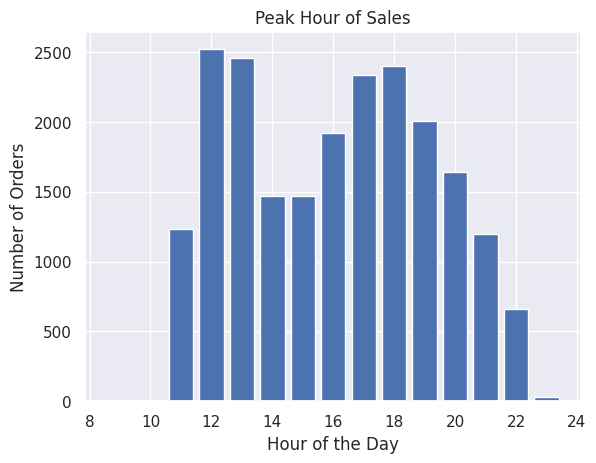

<Figure size 1200x600 with 0 Axes>

In [ ]:
#visualization of peak hour of sales using bar chart

peak_hour_of_sales = df_final.groupby('hour')['order_id'].nunique()
plt.bar(peak_hour_of_sales.index, peak_hour_of_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak Hour of Sales')
plt.figure(figsize=(12,6))
plt.show()

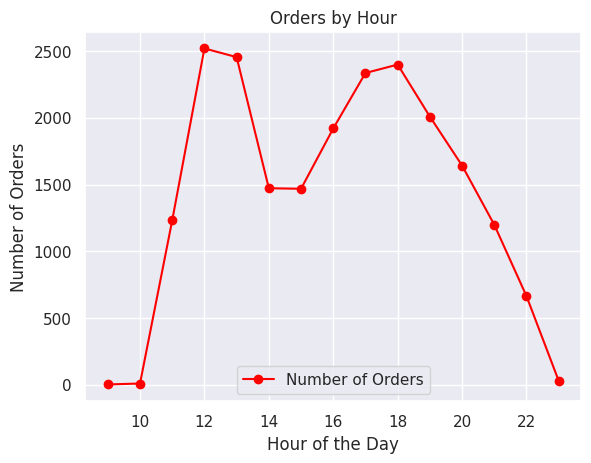

In [ ]:
#visualization of peak hour of sales using line plot

plt.plot(peak_hour_of_sales.index, peak_hour_of_sales.values, label="Number of Orders", marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour')
plt.legend()
plt.show()

In [ ]:
df_final.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day_of_week,month,hour,timestamp,total_sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,January,11,2015-01-01 11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Thursday,January,11,2015-01-01 11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",Thursday,January,11,2015-01-01 11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Thursday,January,11,2015-01-01 11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,January,11,2015-01-01 11:57:40,16.00


In [ ]:
#total sales made on each day of the week

total_sales_by_day = df_final.groupby('day_of_week')['total_sales'].sum()

#define chronological order of weekdays
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#reindex the series to enforce chronological order
total_sales_by_day = total_sales_by_day.reindex(day_order)

total_sales_by_day

,total_sales
day_of_week,
Monday,107329.55
Tuesday,114133.80
Wednesday,114408.40
Thursday,123528.50
Friday,136073.90
Saturday,123182.40
Sunday,99203.50


In [ ]:
#getting the day of the week with most sales

daily_sales = df_final.groupby('day_of_week').size().idxmax()
print(f"The day of the week with most sales is {daily_sales}")

The day of the week with most sales is Friday


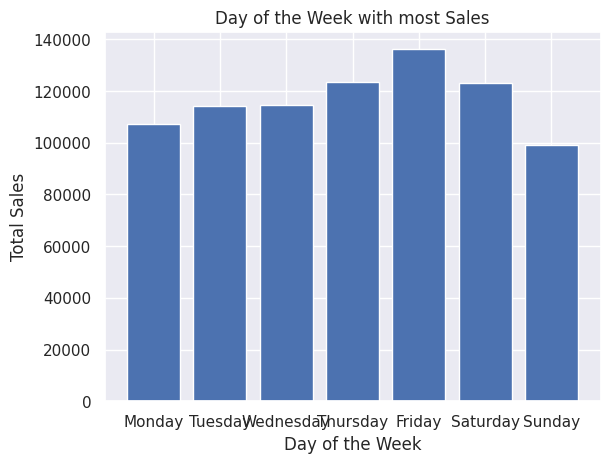

<Figure size 400x300 with 0 Axes>

In [ ]:
#visualization of the data of the week with most sales using a bar chart

plt.bar(total_sales_by_day.index, total_sales_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Day of the Week with most Sales')
plt.figure(figsize=(4,3))
plt.show()


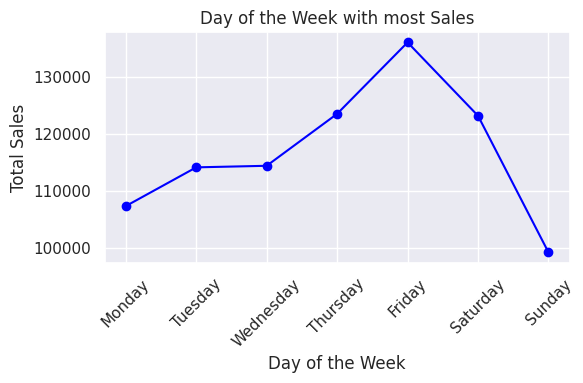

In [ ]:
#visualization of day of the week with most sales using line plot

plt.figure(figsize=(6,3))
plt.plot(total_sales_by_day.index, total_sales_by_day.values, marker='o', color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Day of the Week with most Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#finding the top 5 bestselling pizzas

top_5_bestseller_pizzas = df_final.groupby('name')['total_sales'].sum().sort_values(ascending=False)
top_5_bestseller_pizzas.head(5)

,total_sales
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25


In [ ]:
print(f"The Best Selling Pizza is {top_5_bestseller_pizzas.idxmax()}")

The Best Selling Pizza is The Thai Chicken Pizza


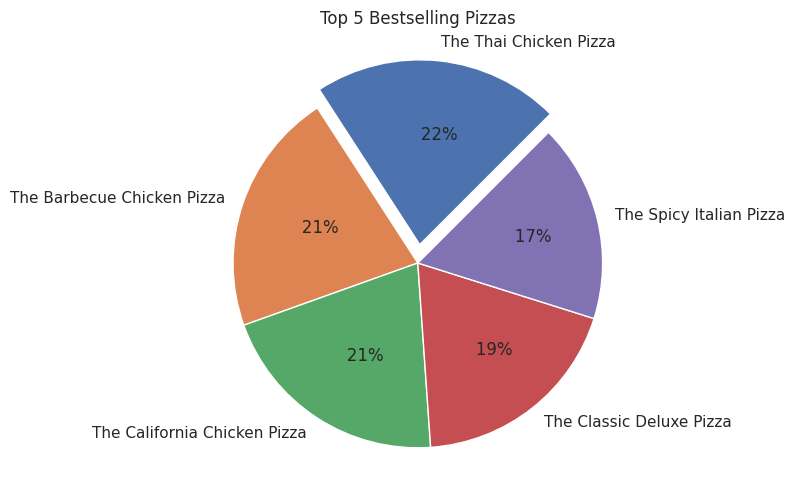

In [ ]:
#visualization of the top 5 bestselling pizzas using pie chart

plt.figure(figsize=(6,6))
plt.pie(top_5_bestseller_pizzas.head(5), labels=top_5_bestseller_pizzas.head(5).index, autopct='%5.0f%%', startangle=45, explode=[0.1, 0, 0, 0, 0])
plt.title('Top 5 Bestselling Pizzas')
plt.show()

In [ ]:
#sales made in each month

total_sales_by_month = df_final.groupby('month')['total_sales'].sum()

#define chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#reindex the series to enforce chronological order
total_sales_by_month = total_sales_by_month.reindex(month_order)

total_sales_by_month

,total_sales
month,
January,69793.30
February,65159.60
March,70397.10
April,68736.80
May,71402.75
June,68230.20
July,72557.90
August,68278.25
September,64180.05


In [ ]:
print(f"The Month with highest sales is {total_sales_by_month.idxmax()}")

The Month with highest sales is July


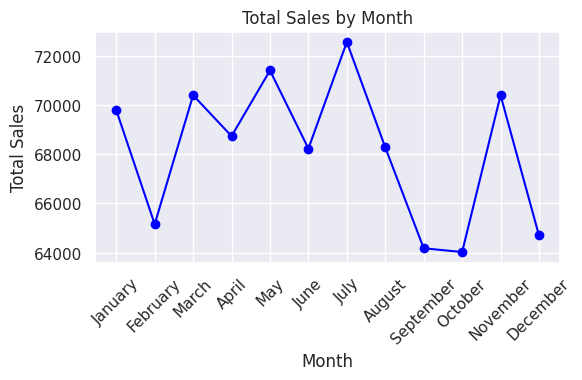

In [ ]:
#visualization of sales made in each month using line plot

plt.figure(figsize=(6,3))
plt.plot(total_sales_by_month.index, total_sales_by_month.values, marker='o', color='blue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##SOME NOTICEABLE TRENDS FROM THE MONTHLY SALES

There is an obvious zigzag pattern and flunctuating trend, and this is because sales never stayed stable for more than one month; consistent bounce between high performing months and sharp dips.

In [ ]:
#identifying pizza types that are not doing well

lowest_selling_pizzas = df_final.groupby('name')['total_sales'].sum().sort_values(ascending=True)
lowest_selling_pizzas

,total_sales
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00
The Calabrese Pizza,15934.25
The Italian Vegetables Pizza,16019.25
The Soppressata Pizza,16425.75
The Chicken Pesto Pizza,16701.75


In [ ]:
#picking 5 of the lowest selling pizzas

lowest_selling_pizzas.head(5)

,total_sales
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00


In [ ]:
print(f"The Pizza with lowest sales is {lowest_selling_pizzas.index[0]}")


The Pizza with lowest sales is The Brie Carre Pizza


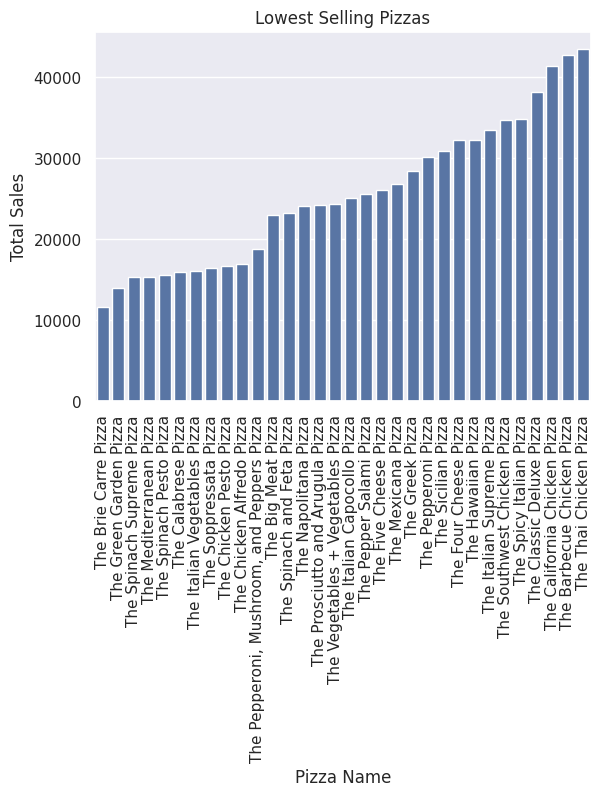

In [ ]:
#visualization lowest selling pizzas using bar plot

sns.barplot(x=lowest_selling_pizzas.index, y=lowest_selling_pizzas.values)
plt.title('Lowest Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

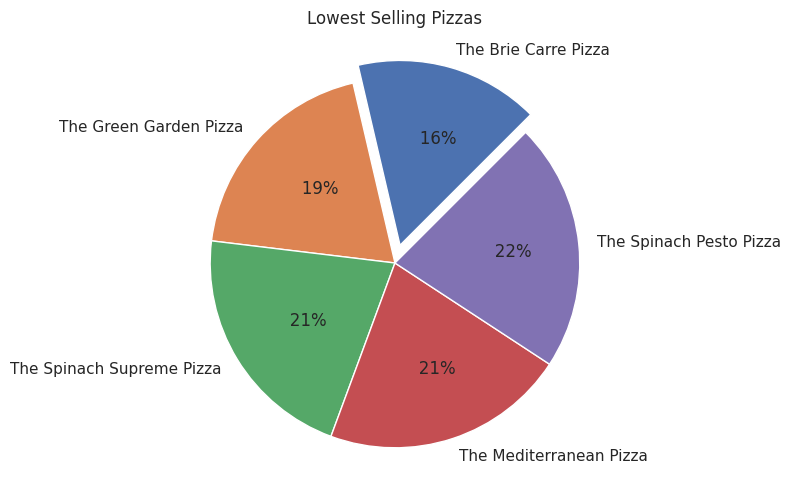

In [ ]:
#visualization of lowest selling pizzas using pie chart

plt.figure(figsize=(6,6))
plt.pie(lowest_selling_pizzas.head(5), labels=lowest_selling_pizzas.head(5).index, autopct='%5.0f%%', startangle=45, explode=[0.1, 0, 0, 0, 0])
plt.title('Lowest Selling Pizzas')
plt.show()

##KEY INSIGHTS

1. There is a peak in sales in July, reaching over $72k in revenue, but a significant dip in September-October.

2. Looking at the chart 12pm is the peak hour, and Friday is the day with most sales.
Recommendation: Ensure maximum staff are available at peak hours in order to reduce wait time.

3. The Brie Carre Pizza is the pizza with lowest sales.
Recommendation: Management may want to rethink its ingredient or marketing as it has the lowest demand.

